In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Outils chargés avec succès ! 🚀")

Outils chargés avec succès ! 🚀


In [45]:
# Charger les données
df = pd.read_csv('animes.csv')
df.head(10)


,Anime,Genre_Tags,Source,Nb_Episodes,Status,Studio,Date_Pub,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,Comm_Meilleur_Ep,Note_Pire_Ep,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Comm_Saison_3
0,Naruto,Action / Shonen,Manga,220,Fini,Studio Pierrot,2002-10-03,8.4,9.6,Ep 133: Le cri des larmes,Animation fluide et combat viscéral incroyable.,5.8,Ep 26: Journal de Konoha (Recap),"Remplissage inutile, à sauter.","Arc Zabuza très émouvant, bases solides.",Examen Chuunin introduit une tension sombre.,Combat Lee vs Gaara légendaire.
1,Trigun,Sci-Fi / Action,Manga,26,Fini,Madhouse,1998-04-01,8.2,9.1,Ep 24: Le péché (Sin),"Conclusion tragique de l'arc Wolfwood, émotion...",6.5,Ep 13: Vash the Stampede (Recap),Résumé de mi-saison qui casse le rythme.,"Début western comique, Vash joue l'idiot.",Virage dramatique sombre avec les Gung-Ho Guns.,Révélations philosophiques sur le passé et Kni...
2,Dragon Ball Z,Action / Shonen,Manga,291,Fini,Toei Animation,1989-04-26,8.7,9.4,Ep 237: Le sacrifice d'un père,"Rédemption ultime de Vegeta, sommet émotionnel.",5.9,Ep 39: Amis ou ennemis (Fake Namek),"Filler ennuyeux sur une fausse planète, inutile.",Introduction des Saiyans et codes du Shonen po...,Aventure spatiale et tension tactique sur Namek.,"Transformation Super Saiyan iconique, combat é..."
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Manga,64,Fini,Bones,2009-04-05,9.1,9.6,Ep 63: De l'autre côté de la porte,"Sacrifice thématique parfait, conclusion magis...",6.3,Ep 27: Intermède (Recap),Episode récapitulatif cassant le rythme.,"Début effréné, traumatisme Nina Tucker marquant.",Complot politique et Mustang brille contre Lust.,"Ambiance militaire froide à Briggs, tension mo..."
4,Cowboy Bebop,Sci-Fi / Noir,Original,26,Fini,Sunrise,1998-04-03,8.8,9.7,Ep 26: The Real Folk Blues Pt.2,Fin poétique et iconique. Bang.,7.2,Ep 23: Boogie Woogie Feng Shui,Intrigue faible et rythme un peu mou.,Formation de l'équipe et choc visuel à l'église.,Exploration mélancolique du passé (Jupiter Jazz).,Confrontation fatale avec le Syndicat et Vicious.
5,Sword Art Online,Isekai / Romance,Light Novel,25,Fini,A-1 Pictures,2012-07-08,7.2,8.9,Ep 9: Le démon aux yeux bleus,"Hype absolue, révélation du Dual Wield.",5.9,Ep 22: La grande quête (Alfheim),Rythme lent et enjeux faibles dans l'arc des f...,"Concept 'Jeu de la mort' accrocheur, romance f...","Chute de qualité, méchant caricatural et moins...",Retour en force avec Gun Gale Online et ton pl...
6,Re:Zero,Isekai / Psychologique,Light Novel,50,Fini,White Fox,2016-04-04,8.2,9.8,Ep 15: L'extérieur de la folie,"Chef d'oeuvre d'horreur et de désespoir, fin l...",7.6,Ep 13: Le chevalier autoproclamé,"Episode gênant (cringe) voulu par le scénario,...",Boucle temporelle et basculement vers le thril...,Arc Sanctuaire dense en dialogues et passé des...,"Résolution intelligente, Subaru grandit et uti..."
7,Dr. Stone,Sci-Fi / Adventure,Manga,57,En cours,TMS Entertainment,2019-07-05,8.3,9.1,Ep 24: Les voix vers l'infini,"Conclusion S1 émouvante, lien passé-futur subl...",7.1,Ep 14: Master of Flame,"Rythme un peu plus lent, préparation de tournoi.","Le réveil dans un monde de pierre, la science ...",Stone Wars : Conflit idéologique et batailles ...,New World : Exploration maritime et découverte...
8,One Piece,Adventure / Shonen,Manga,1090,En cours,Toei Animation,1999-10-20,8.7,9.8,Ep 1015: Chapeau de Paille Luffy,"Réalisation cinéma époustouflante, sommet de W...",5.6,Ep 336: Chopperman (Filler),Episode hors-série enfantin totalement dispens...,"Saga East Blue : La formation de l'équipage, n...",Saga Alabasta : Premier grand défi géopolitiqu...,Saga Skypiea/Water 7 : Aventure céleste puis d...
9,Blue Lock,Sport / Thriller,Manga,36,En cours,8bit,2022-10-09,8.2,9.3,Ep 11: La dernière pièce,"Le puzzle s'assemble, le but d'Isagi est jouis...",6.0,Ep 22: Voice (S2),"Qualité d'animation en baisse critique, beauco...","Concept Battle Royale de foot, égoïsme pur mis...","Sélection U-20, enjeux d'équipe vs individua

In [22]:

# Analyse exploratoire des données
print("Valeurs manquantes par colonne :")
# verifier les valeurs manquantes
display(df.isna().sum())
# verifier les doublons
print("\nNombre de doublons :", df.duplicated().sum())
# types de colonnes
print("\nTypes de colonnes :")
display(df.dtypes)

Valeurs manquantes par colonne :


Anime                 0
Genre_Tags            0
Source                0
Nb_Episodes           0
Status                0
Studio                0
Date_Pub              0
Note_Globale          0
Note_Meilleur_Ep      0
Meilleur_Ep_Titre     0
Comm_Meilleur_Ep      0
Note_Pire_Ep          0
Pire_Ep_Titre         0
Comm_Pire_Ep          0
Comm_Saison_1         0
Comm_Saison_2         0
Comm_Saison_3        10
dtype: int64


Nombre de doublons : 2

Types de colonnes :


Anime                 object
Genre_Tags            object
Source                object
Nb_Episodes            int64
Status                object
Studio                object
Date_Pub              object
Note_Globale         float64
Note_Meilleur_Ep     float64
Meilleur_Ep_Titre     object
Comm_Meilleur_Ep      object
Note_Pire_Ep         float64
Pire_Ep_Titre         object
Comm_Pire_Ep          object
Comm_Saison_1         object
Comm_Saison_2         object
Comm_Saison_3         object
dtype: object

In [87]:
# Copie pour éviter les warnings et garder un original
df_clean = df.copy()


# 1. Supprimer les lignes avec valeurs manquantes (ici Produit)
df_clean = df_clean.dropna()

# 2. Supprimer les doublons
df_clean = df_clean.drop_duplicates()

# 3. Supprimer la colonne 'Comm_Saison_3' (non utilisée pour l'analyse ventes)
df_clean = df_clean.drop(columns=['Date_Pub'])
# <-- seulement 20 lignes affichée
print("Données nettoyées ! ✅")
display(df_clean.head(10))

Données nettoyées ! ✅


,Anime,Genre_Tags,Source,Nb_Episodes,Status,Studio,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,Comm_Meilleur_Ep,Note_Pire_Ep,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Comm_Saison_3
0,Naruto,Action / Shonen,Manga,220,Fini,Studio Pierrot,8.4,9.6,Ep 133: Le cri des larmes,Animation fluide et combat viscéral incroyable.,5.8,Ep 26: Journal de Konoha (Recap),"Remplissage inutile, à sauter.","Arc Zabuza très émouvant, bases solides.",Examen Chuunin introduit une tension sombre.,Combat Lee vs Gaara légendaire.
1,Trigun,Sci-Fi / Action,Manga,26,Fini,Madhouse,8.2,9.1,Ep 24: Le péché (Sin),"Conclusion tragique de l'arc Wolfwood, émotion...",6.5,Ep 13: Vash the Stampede (Recap),Résumé de mi-saison qui casse le rythme.,"Début western comique, Vash joue l'idiot.",Virage dramatique sombre avec les Gung-Ho Guns.,Révélations philosophiques sur le passé et Kni...
2,Dragon Ball Z,Action / Shonen,Manga,291,Fini,Toei Animation,8.7,9.4,Ep 237: Le sacrifice d'un père,"Rédemption ultime de Vegeta, sommet émotionnel.",5.9,Ep 39: Amis ou ennemis (Fake Namek),"Filler ennuyeux sur une fausse planète, inutile.",Introduction des Saiyans et codes du Shonen po...,Aventure spatiale et tension tactique sur Namek.,"Transformation Super Saiyan iconique, combat é..."
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Manga,64,Fini,Bones,9.1,9.6,Ep 63: De l'autre côté de la porte,"Sacrifice thématique parfait, conclusion magis...",6.3,Ep 27: Intermède (Recap),Episode récapitulatif cassant le rythme.,"Début effréné, traumatisme Nina Tucker marquant.",Complot politique et Mustang brille contre Lust.,"Ambiance militaire froide à Briggs, tension mo..."
4,Cowboy Bebop,Sci-Fi / Noir,Original,26,Fini,Sunrise,8.8,9.7,Ep 26: The Real Folk Blues Pt.2,Fin poétique et iconique. Bang.,7.2,Ep 23: Boogie Woogie Feng Shui,Intrigue faible et rythme un peu mou.,Formation de l'équipe et choc visuel à l'église.,Exploration mélancolique du passé (Jupiter Jazz).,Confrontation fatale avec le Syndicat et Vicious.
5,Sword Art Online,Isekai / Romance,Light Novel,25,Fini,A-1 Pictures,7.2,8.9,Ep 9: Le démon aux yeux bleus,"Hype absolue, révélation du Dual Wield.",5.9,Ep 22: La grande quête (Alfheim),Rythme lent et enjeux faibles dans l'arc des f...,"Concept 'Jeu de la mort' accrocheur, romance f...","Chute de qualité, méchant caricatural et moins...",Retour en force avec Gun Gale Online et ton pl...
6,Re:Zero,Isekai / Psychologique,Light Novel,50,Fini,White Fox,8.2,9.8,Ep 15: L'extérieur de la folie,"Chef d'oeuvre d'horreur et de désespoir, fin l...",7.6,Ep 13: Le chevalier autoproclamé,"Episode gênant (cringe) voulu par le scénario,...",Boucle temporelle et basculement vers le thril...,Arc Sanctuaire dense en dialogues et passé des...,"Résolution intelligente, Subaru grandit et uti..."
7,Dr. Stone,Sci-Fi / Adventure,Manga,57,En cours,TMS Entertainment,8.3,9.1,Ep 24: Les voix vers l'infini,"Conclusion S1 émouvante, lien passé-futur subl...",7.1,Ep 14: Master of Flame,"Rythme un peu plus lent, préparation de tournoi.","Le réveil dans un monde de pierre, la science ...",Stone Wars : Conflit idéologique et batailles ...,New World : Exploration maritime et découverte...
8,One Piece,Adventure / Shonen,Manga,1090,En cours,Toei Animation,8.7,9.8,Ep 1015: Chapeau de Paille Luffy,"Réalisation cinéma époustouflante, sommet de W...",5.6,Ep 336: Chopperman (Filler),Episode hors-série enfantin totalement dispens...,"Saga East Blue : La formation de l'équipage, n...",Saga Alabasta : Premier grand défi géopolitiqu...,Saga Skypiea/Water 7 : Aventure céleste puis d...
9,Blue Lock,Sport / Thriller,Manga,36,En cours,8bit,8.2,9.3,Ep 11: La dernière pièce,"Le puzzle s'assemble, le but d'Isagi est jouis...",6.0,Ep 22: Voice (S2),"Qualité d'animation en baisse critique, beauco...","Concept Battle Royale de foot, égoïsme pur mis...","Sélection U-20, enjeux d'équipe vs individualité.",(Non diffusé)


In [47]:
# calculer l'écart entre la meilleure et la pire note
df_clean['Ecart_Note'] = df_clean['Note_Meilleur_Ep'] - df_clean['Note_Pire_Ep']
display(df_clean.head(10))

,Anime,Genre_Tags,Source,Nb_Episodes,Status,Studio,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,Comm_Meilleur_Ep,Note_Pire_Ep,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Ecart_Note
0,Naruto,Action / Shonen,Manga,220,Fini,Studio Pierrot,8.4,9.6,Ep 133: Le cri des larmes,Animation fluide et combat viscéral incroyable.,5.8,Ep 26: Journal de Konoha (Recap),"Remplissage inutile, à sauter.","Arc Zabuza très émouvant, bases solides.",Examen Chuunin introduit une tension sombre.,3.8
1,Trigun,Sci-Fi / Action,Manga,26,Fini,Madhouse,8.2,9.1,Ep 24: Le péché (Sin),"Conclusion tragique de l'arc Wolfwood, émotion...",6.5,Ep 13: Vash the Stampede (Recap),Résumé de mi-saison qui casse le rythme.,"Début western comique, Vash joue l'idiot.",Virage dramatique sombre avec les Gung-Ho Guns.,2.6
2,Dragon Ball Z,Action / Shonen,Manga,291,Fini,Toei Animation,8.7,9.4,Ep 237: Le sacrifice d'un père,"Rédemption ultime de Vegeta, sommet émotionnel.",5.9,Ep 39: Amis ou ennemis (Fake Namek),"Filler ennuyeux sur une fausse planète, inutile.",Introduction des Saiyans et codes du Shonen po...,Aventure spatiale et tension tactique sur Namek.,3.5
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Manga,64,Fini,Bones,9.1,9.6,Ep 63: De l'autre côté de la porte,"Sacrifice thématique parfait, conclusion magis...",6.3,Ep 27: Intermède (Recap),Episode récapitulatif cassant le rythme.,"Début effréné, traumatisme Nina Tucker marquant.",Complot politique et Mustang brille contre Lust.,3.3
4,Cowboy Bebop,Sci-Fi / Noir,Original,26,Fini,Sunrise,8.8,9.7,Ep 26: The Real Folk Blues Pt.2,Fin poétique et iconique. Bang.,7.2,Ep 23: Boogie Woogie Feng Shui,Intrigue faible et rythme un peu mou.,Formation de l'équipe et choc visuel à l'église.,Exploration mélancolique du passé (Jupiter Jazz).,2.5
5,Sword Art Online,Isekai / Romance,Light Novel,25,Fini,A-1 Pictures,7.2,8.9,Ep 9: Le démon aux yeux bleus,"Hype absolue, révélation du Dual Wield.",5.9,Ep 22: La grande quête (Alfheim),Rythme lent et enjeux faibles dans l'arc des f...,"Concept 'Jeu de la mort' accrocheur, romance f...","Chute de qualité, méchant caricatural et moins...",3.0
6,Re:Zero,Isekai / Psychologique,Light Novel,50,Fini,White Fox,8.2,9.8,Ep 15: L'extérieur de la folie,"Chef d'oeuvre d'horreur et de désespoir, fin l...",7.6,Ep 13: Le chevalier autoproclamé,"Episode gênant (cringe) voulu par le scénario,...",Boucle temporelle et basculement vers le thril...,Arc Sanctuaire dense en dialogues et passé des...,2.2
7,Dr. Stone,Sci-Fi / Adventure,Manga,57,En cours,TMS Entertainment,8.3,9.1,Ep 24: Les voix vers l'infini,"Conclusion S1 émouvante, lien passé-futur subl...",7.1,Ep 14: Master of Flame,"Rythme un peu plus lent, préparation de tournoi.","Le réveil dans un monde de pierre, la science ...",Stone Wars : Conflit idéologique et batailles ...,2.0
8,One Piece,Adventure / Shonen,Manga,1090,En cours,Toei Animation,8.7,9.8,Ep 1015: Chapeau de Paille Luffy,"Réalisation cinéma époustouflante, sommet de W...",5.6,Ep 336: Chopperman (Filler),Episode hors-série enfantin totalement dispens...,"Saga East Blue : La formation de l'équipage, n...",Saga Alabasta : Premier grand défi géopolitiqu...,4.2
9,Blue Lock,Sport / Thriller,Manga,36,En cours,8bit,8.2,9.3,Ep 11: La dernière pièce,"Le puzzle s'assemble, le but d'Isagi est jouis...",6.0,Ep 22: Voice (S2),"Qualité d'animation en baisse critique, beauco...","Concept Battle Royale de foot, égoïsme pur mis...","Sélection U-20, enjeux d'équipe vs individualité.",3.3


In [39]:
# Analyse statistique de base
ca_min = df_clean['Ecart_Note'].min()
ca_max = df_clean['Ecart_Note'].max()
ca_moyenne = df_clean['Ecart_Note'].mean()
ca_mediane = df_clean['Ecart_Note'].median()

print(f" Min: {ca_min:} | Max: {ca_max:} ")
print(f" Moyenne: {ca_moyenne:}  | Médiane: {ca_mediane:} ")

 Min: 0.8000000000000007 | Max: 8.2 
 Moyenne: 2.7632653061224484  | Médiane: 2.499999999999999 


,Note_Meilleur_Ep,Note_Pire_Ep,Ecart_Note
Note_Meilleur_Ep,1.000000,0.032590,0.267852
Note_Pire_Ep,0.032590,1.000000,-0.954219
Ecart_Note,0.267852,-0.954219,1.000000


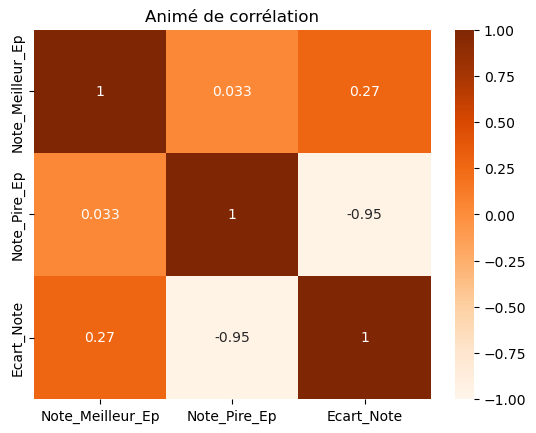

In [44]:
# correlation entre variables numériques
correlation = df_clean[['Note_Meilleur_Ep', 'Note_Pire_Ep', 'Ecart_Note']].corr()
display(correlation)
sns.heatmap(correlation, annot=True, cmap='Oranges', vmin=-1, vmax=1)
plt.title("Animé de corrélation")
plt.show()

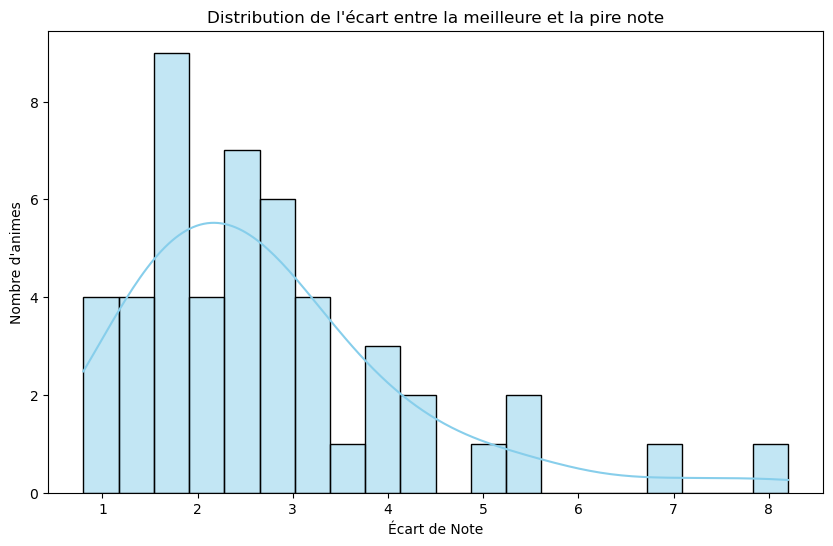

In [35]:
# Visualisation de la distribution des notes moyennes
df_top10 = df_clean.head(10)  # prend les 10 premiers animes
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Ecart_Note'], bins=20, kde=True, color='skyblue')
plt.title("Distribution de l'écart entre la meilleure et la pire note")
plt.xlabel("Écart de Note")
plt.ylabel("Nombre d'animes")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_146088\1326453054.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


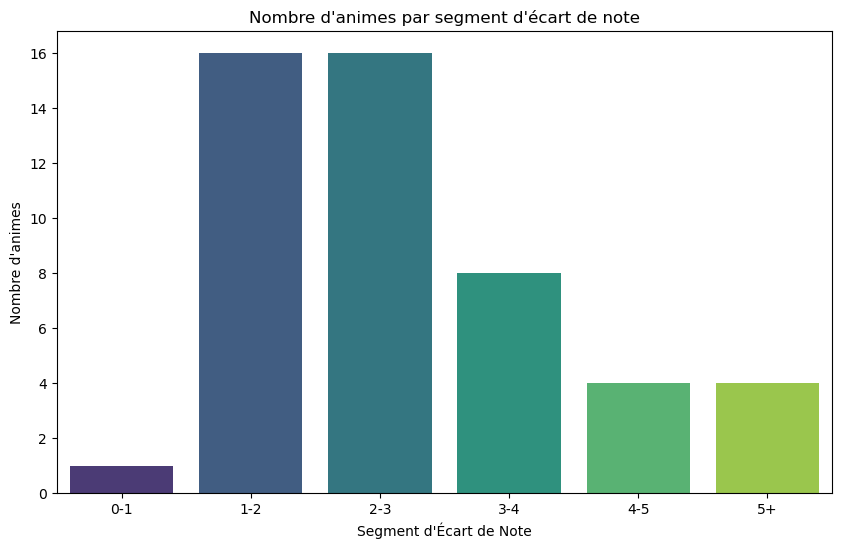

In [34]:
# segmentation des animes par écart de note
df_top10 = df_clean.head(10)  # prend les 10 premiers animes

bins = [0, 1, 2, 3, 4, 5, 10]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5+']
df_clean['Ecart_Note_Segment'] = pd.cut(df_clean['Ecart_Note'], bins=bins, labels=labels, right=False)
segment_counts = df_clean['Ecart_Note_Segment'].value_counts().sort_index() 
# Visualisation des segments
plt.figure(figsize=(10, 6))  
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title("Nombre d'animes par segment d'écart de note")
plt.xlabel("Segment d'Écart de Note")
plt.ylabel("Nombre d'animes")   
plt.show()


In [33]:
# Recommandation éditoriale 
# Animes avec écart de note élevé (5+)
from IPython.display import display

animes_5_plus = df_clean[df_clean['Ecart_Note'] >= 5]
print("Animes avec un écart de note élevé (5+):")
display(animes_5_plus[['Anime', 'Note_Meilleur_Ep', 'Note_Pire_Ep', 'Ecart_Note']])

animes_0_1 = df_clean[df_clean['Ecart_Note'] < 1]
print("\nAnimes avec un écart de note faible (0-1):")
display(animes_0_1[['Anime', 'Note_Meilleur_Ep', 'Note_Pire_Ep', 'Ecart_Note']] 
    .head(10)    
    )



Animes avec un écart de note élevé (5+):


,Anime,Note_Meilleur_Ep,Note_Pire_Ep,Ecart_Note
14,Medalist,8.2,0.0,8.2
23,Naruto Shippuden,9.7,4.3,5.4
34,Boruto: Naruto Next Generations,9.9,4.3,5.6
50,Black Clover,9.7,2.7,7.0



Animes avec un écart de note faible (0-1):


,Anime,Note_Meilleur_Ep,Note_Pire_Ep,Ecart_Note
38,Claymore,8.4,7.6,0.8
